In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data() # 워낙 많이 쓰이니 미리 이렇게 만들어버림(6:1)

# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float64')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float64')/255

# 바이너리화 과정(원 핫 인코딩)
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)


Using TensorFlow backend.


In [2]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                   epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test,Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']



Epoch 00001: val_loss improved from inf to 0.05227, saving model to ./model/01-0.0523.hdf5

Epoch 00002: val_loss improved from 0.05227 to 0.04142, saving model to ./model/02-0.0414.hdf5

Epoch 00003: val_loss improved from 0.04142 to 0.03634, saving model to ./model/03-0.0363.hdf5

Epoch 00004: val_loss did not improve from 0.03634

Epoch 00005: val_loss improved from 0.03634 to 0.03532, saving model to ./model/05-0.0353.hdf5

Epoch 00006: val_loss improved from 0.03532 to 0.03297, saving model to ./model/06-0.0330.hdf5

Epoch 00007: val_loss did not improve from 0.03297

Epoch 00008: val_loss did not improve from 0.03297

Epoch 00009: val_loss improved from 0.03297 to 0.03191, saving model to ./model/09-0.0319.hdf5

Epoch 00010: val_loss improved from 0.03191 to 0.03181, saving model to ./model/10-0.0318.hdf5

Epoch 00011: val_loss did not improve from 0.03181

Epoch 00012: val_loss improved from 0.03181 to 0.03007, saving model to ./model/12-0.0301.hdf5

Epoch 00013: val_loss did n

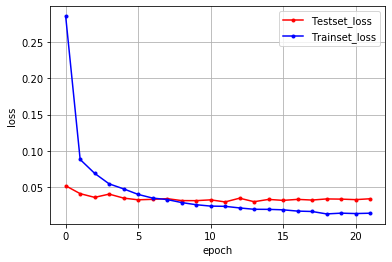

In [3]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
